In [10]:
library(stm)
library(readr)
library(ggplot2)
library(slam)

In [11]:
dtm <- read.csv("DTM_new.csv", header = TRUE, row.names = 1)

dtm <- as.matrix(dtm)
vocab <- colnames(dtm)

documents <- lapply(1:nrow(dtm), function(i) {
  doc <- dtm[i, ]
  words <- which(doc > 0)
  counts <- doc[words]
  matrix(c(words, counts), nrow = 2, byrow = TRUE)
})

str(documents)

List of 1392
 $ : int [1:2, 1:34] 373 1 458 1 522 1 1363 1 1378 1 ...
 $ : int [1:2, 1:72] 118 1 132 1 142 1 160 1 195 1 ...
 $ : int [1:2, 1:38] 65 1 128 1 183 1 299 2 300 1 ...
 $ : int [1:2, 1:97] 52 1 60 2 62 1 116 1 289 2 ...
 $ : int [1:2, 1:43] 67 1 104 1 195 1 381 1 553 1 ...
 $ : int [1:2, 1:56] 114 1 200 1 240 2 522 1 705 1 ...
 $ : int [1:2, 1:108] 166 1 181 1 367 1 373 2 458 1 ...
 $ : int [1:2, 1:54] 166 1 200 1 255 1 458 1 500 1 ...
 $ : int [1:2, 1:120] 60 1 61 2 62 1 166 1 250 1 ...
 $ : int [1:2, 1:95] 55 1 60 1 67 1 114 1 195 1 ...
 $ : int [1:2, 1:23] 128 1 180 1 1363 1 1526 3 2208 1 ...
 $ : int [1:2, 1:57] 147 1 458 1 615 1 822 1 871 1 ...
 $ : int [1:2, 1:30] 27 1 200 2 693 1 1255 1 1265 1 ...
 $ : int [1:2, 1:46] 381 4 607 1 610 1 804 5 951 1 ...
 $ : int [1:2, 1:46] 381 4 607 1 610 1 804 5 951 1 ...
 $ : int [1:2, 1:57] 27 1 49 1 142 1 313 1 602 1 ...
 $ : int [1:2, 1:64] 57 3 60 1 76 2 195 3 200 1 ...
 $ : int [1:2, 1:60] 76 1 113 1 195 1 200 1 381 1 ...
 $ : i

Warning message in stm(documents = heldout$documents, vocab = heldout$vocab, K = k, :
"K=2 is equivalent to a unidimensional scaling model which you may prefer."
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

Warning message in stm(documents = documents, vocab = vocab, K = k, data = data.frame(doc_id = 1:nrow(dtm)), :
"K=2 is equivalent to a unidimensional scaling model which you may prefer."


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	..
	 Recovering initialization...
 	.........................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.281) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.179, relative change = 1.399e-02) 
....................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -7.150, relative change = 3.996e-03) 
....................................................................

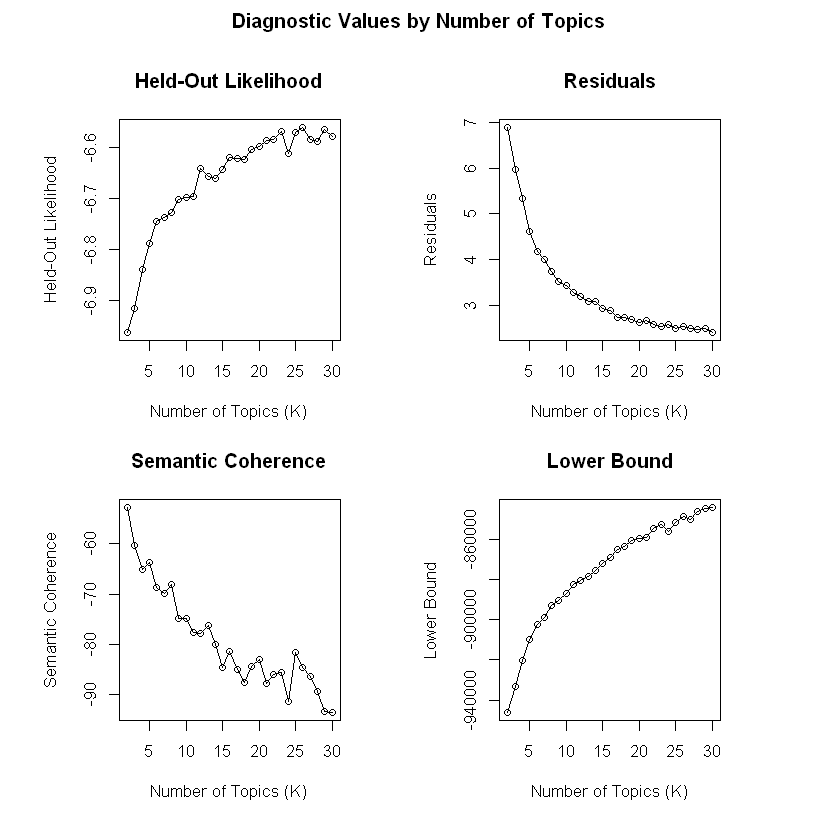

In [3]:
candidate_K <- c(2:30)

heldout_results <- searchK(documents = documents, vocab = vocab, K = candidate_K, data = data.frame(doc_id = 1:nrow(dtm)), init.type = "Random")

plot(heldout_results)

result_list <- list()
for (k in candidate_K) {
  model <- stm(documents = documents, vocab = vocab, K = k, data = data.frame(doc_id = 1:nrow(dtm)), init.type = "Spectral")
  result_list[[as.character(k)]] <- list(model = model, coherence = semanticCoherence(model, documents), exclusivity = exclusivity(model))
}

coherence_values <- sapply(result_list, function(x) mean(x$coherence))
exclusivity_values <- sapply(result_list, function(x) mean(x$exclusivity))
df <- data.frame(K = candidate_K, Coherence = coherence_values, Exclusivity = exclusivity_values)

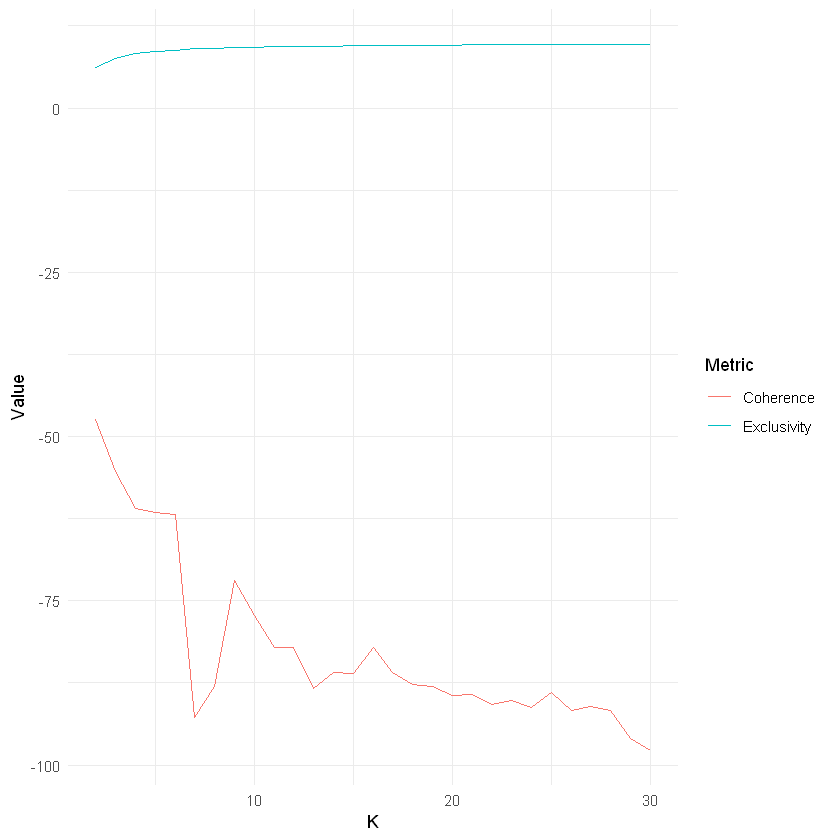

In [4]:
# 假设 df 是一个数据框，K 是其中的列
ggplot(data = df, aes(x = K)) +
  geom_line(aes(y = Coherence, color = "Coherence")) +
  geom_line(aes(y = Exclusivity, color = "Exclusivity")) +
  labs(y = "Value", color = "Metric") +  
  theme_minimal()

In [12]:
stm_model <- stm(documents = documents, vocab = vocab, K = 13, data = data.frame(doc_id = 1:nrow(dtm)))

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	.............
	 Recovering initialization...
 	.........................................................................................
Initialization complete.
...........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -7.195) 
...........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.754, relative change = 6.130e-02) 
...........................................................................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -6.691, relative change = 9.282e-03) 
....................................

In [13]:
summary(stm_model)

A topic model with 13 topics, 1392 documents and a 8912 word dictionary.


Topic 1 Top Words:
 	 Highest Prob: soil, fertilizer, organic, invention, straw, nutrient, material 
 	 FREX: compost, straw, mulch, floor, gutter, hydrogel, fertility 
 	 Lift: hailstorm, pasteurization, pasture, publish, trolley, watertight, acidic 
 	 Score: compost, straw, hydrogel, mulch, returningtofield, mulching, gutter 
Topic 2 Top Words:
 	 Highest Prob: system, agricultural, resource, agriculture, crop, management, environmental 
 	 FREX: abstract, revolutionize, predictive, analytic, empower, precise, ai 
 	 Lift: actionable, aidriven, inform, policymaker, predictive, seamlessly, userfriendly 
 	 Score: abstract, challenge, revolutionize, insight, realtime, address, decisionmake 
Topic 3 Top Words:
 	 Highest Prob: rice, method, seed, planting, field, soil, invention 
 	 FREX: seed, seeding, germination, tillage, bud, hydrothermal, sow 
 	 Lift: aber, abroad, acclimated, accomplishment, acutely, adhere, adjoining 
 	 Score: seed, sow, rice, wheat, seedling, cm, seeding 
Top

Topic 1 Top Words:
 	 Highest Prob: soil, fertilizer, organic, invention, straw, nutrient, material 
 	 FREX: compost, straw, mulch, floor, gutter, hydrogel, fertility 
 	 Lift: hailstorm, pasteurization, pasture, publish, trolley, watertight, acidic 
 	 Score: compost, straw, hydrogel, mulch, returningtofield, mulching, gutter 
Topic 2 Top Words:
 	 Highest Prob: system, agricultural, resource, agriculture, crop, management, environmental 
 	 FREX: abstract, revolutionize, predictive, analytic, empower, precise, ai 
 	 Lift: actionable, aidriven, inform, policymaker, predictive, seamlessly, userfriendly 
 	 Score: abstract, challenge, revolutionize, insight, realtime, address, decisionmake 
Topic 3 Top Words:
 	 Highest Prob: rice, method, seed, planting, field, soil, invention 
 	 FREX: seed, seeding, germination, tillage, bud, hydrothermal, sow 
 	 Lift: aber, abroad, acclimated, accomplishment, acutely, adhere, adjoining 
 	 Score: seed, sow, rice, wheat, seedling, cm, seeding 
Top

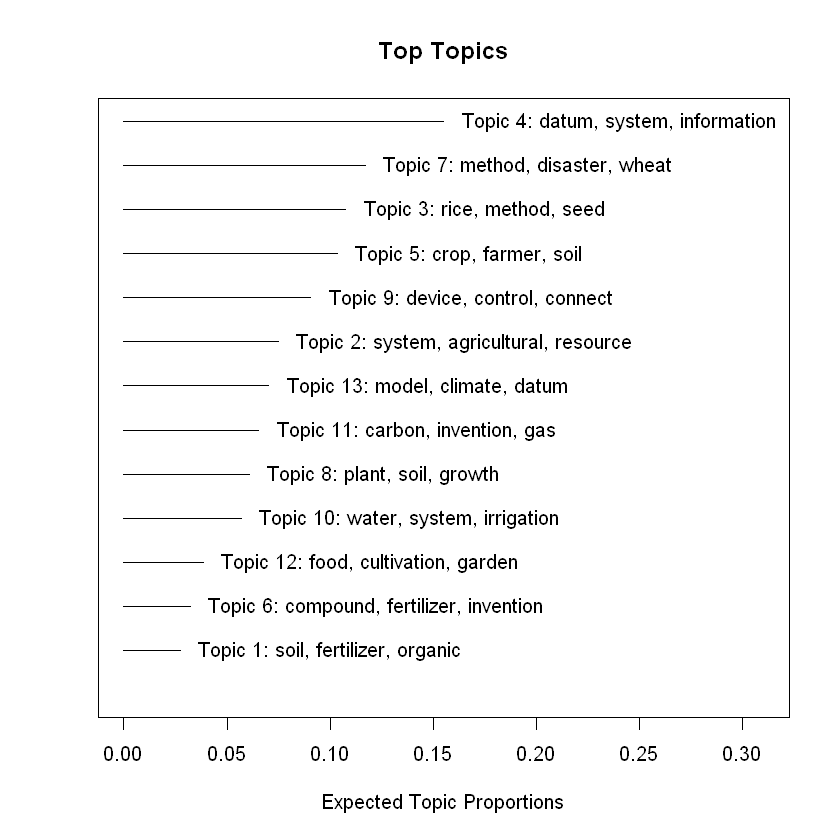

In [14]:
labelTopics(stm_model)
plot(stm_model)

In [15]:
doc_topics <- stm_model$theta

In [16]:
print(doc_topics)

                [,1]         [,2]         [,3]         [,4]         [,5]
   [1,] 6.057261e-02 7.795981e-02 1.118043e-02 0.0528164077 6.957697e-01
   [2,] 2.266706e-02 8.103768e-01 5.131378e-03 0.0069609415 2.449819e-02
   [3,] 2.278975e-03 7.257667e-04 3.008221e-03 0.0007966403 7.783658e-04
   [4,] 3.570362e-03 6.289083e-02 1.800853e-03 0.0115571653 2.481443e-02
   [5,] 1.360253e-02 2.131508e-01 4.844830e-03 0.0451696932 4.829038e-01
   [6,] 5.189392e-03 3.942399e-02 3.627172e-03 0.0566092271 7.359912e-01
   [7,] 1.789418e-03 2.223714e-01 2.319737e-03 0.1209204803 2.306978e-01
   [8,] 5.165448e-03 5.345433e-01 4.893186e-03 0.1572623928 1.071717e-01
   [9,] 5.476785e-04 7.631653e-02 1.431653e-04 0.0051705616 1.526047e-02
  [10,] 5.130785e-03 4.351527e-02 3.232002e-03 0.0188110356 5.956316e-01
  [11,] 3.238190e-03 5.052958e-04 3.191417e-03 0.0118018858 3.238799e-03
  [12,] 6.945178e-03 7.207671e-02 3.650500e-03 0.0718529010 2.212819e-01
  [13,] 3.438513e-04 3.871400e-02 1.424523e-04 0.21

In [17]:
write.csv(stm_model$theta, file = "stm_all_new.csv", row.names = FALSE)